In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from utils_stats.likelihood_ratio_statistic_frequency import *

In [2]:
with open("../data/test/In_Pop.pkl", "rb") as f:
    in_pool = pickle.load(f)
in_pool = np.array([np.unpackbits(np.frombuffer(genome.tobytes(), dtype=np.uint8)) for genome in in_pool])

In [3]:
with open("../data/test/Not_In_Pop.pkl", "rb") as f:
    not_in_pool = pickle.load(f)
not_in_pool = np.array([np.unpackbits(np.frombuffer(genome.tobytes(), dtype=np.uint8)) for genome in not_in_pool])

In [4]:
in_population_pool = np.loadtxt("../data/test/In_Pop_Beacon.txt", delimiter="\t")
pool_allele_frequencies = in_population_pool[:, 1]

In [5]:
num_genomes_in_pool = len(in_pool)
num_genomes_not_in_pool = len(not_in_pool)
num_genomes = num_genomes_in_pool + num_genomes_not_in_pool
num_snps = len(in_pool[0])
target_num_snps = 40000

In [6]:
labels_in_pool = np.ones(num_genomes_in_pool)
labels_not_in_pool = np.zeros(num_genomes_not_in_pool)

In [7]:
genomes = np.concatenate((in_pool, not_in_pool), axis=0)
labels = np.concatenate((labels_in_pool, labels_not_in_pool), axis=0)

In [8]:
genomes_selected = genomes[:, :target_num_snps]
pool_allele_frequencies_selected = pool_allele_frequencies[:target_num_snps]
population_allele_frequencies_selected = np.mean(genomes_selected, axis=0)

In [9]:
likelihood_ratio_statistics_frequency = np.zeros(num_genomes)
for i in range(num_genomes):
    likelihood_ratio_statistics_frequency[i] = likelihood_ratio_statistic_frequency_haploid(pool_allele_frequencies_selected, population_allele_frequencies_selected, genomes_selected[i])

In [10]:
thresholds = np.sort(np.unique(likelihood_ratio_statistics_frequency))

In [11]:
accuracies = []
for threshold in thresholds:
    predictions = likelihood_ratio_statistics_frequency >= threshold
    accuracies.append(np.mean(predictions == labels))

In [12]:
max_accuracy = np.max(accuracies)
max_accuracy_threshold = thresholds[np.argmax(accuracies)]
print(f"Max accuracy: {max_accuracy} at threshold: {max_accuracy_threshold}")

Max accuracy: 0.5525 at threshold: -737.9956886654513


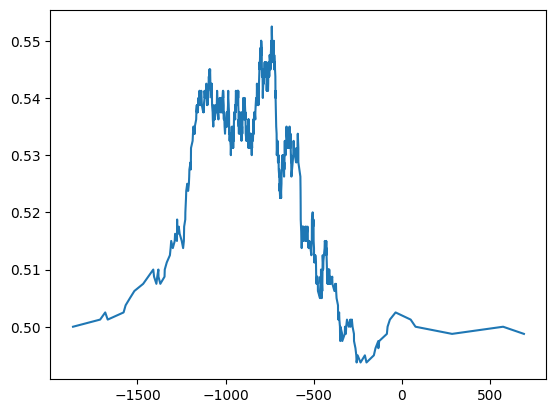

In [13]:
plt.plot(thresholds, accuracies)